In [1]:
import nltk

## Information Extraction

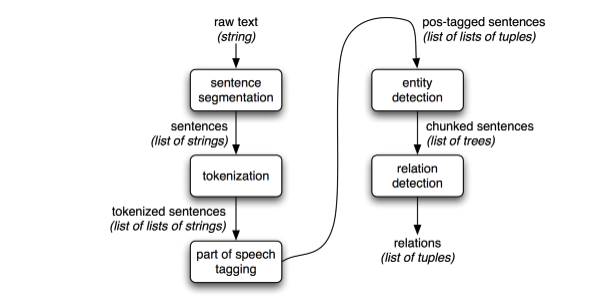

In [2]:
from IPython.display import Image
Image(filename='ch7_1.png')

## Chunking

## Noun Phrase Chunking

**Noun Phrase Chunking** - NP Chunking: chunks corresponding to individual noun phrases.

**POS tagging** is the most useful source of information for **NP chunking**.

In [3]:
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"), ("dog", "NN"), ("barked", "VBD"), ("at", "IN"),  ("the", "DT"), ("cat", "NN")]

Note here:

?: zero or one of the previous item

*: zero or more of the previous item

+: one or more of the previous item

In [4]:
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammar)
result = cp.parse(sentence)
print result

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


Notes: **cp** stands for "chunk parser"

### Tag Patterns

### Chunking with Regular Expressionns

In [5]:
grammar = '''NP: {<DT>?<JJ>*<NN>}
                 {<NNP>+}'''
cp = nltk.RegexpParser(grammar)
sentence = [("Rapunzel", "NNP"), ("let", "VBD"), ("down", "RP"),("her", "PP$"), ("long", "JJ"), ("golden", "JJ"), ("hair", "NN")]

In [6]:
result = cp.parse(sentence)

In [7]:
print result

(S
  (NP Rapunzel/NNP)
  let/VBD
  down/RP
  her/PP$
  (NP long/JJ golden/JJ hair/NN))


#### The Tag pattern only returns the left most matched patterns if the pattern is longer

In [8]:
grammar = '''AlexMeow: {<DT>*<NN>?<JJ>+<VB>+}'''
cp = nltk.RegexpParser(grammar)

brown = nltk.corpus.brown

sent_tags = brown.tagged_sents()
for sent in sent_tags:
    tree = cp.parse(sent)
    for subtree in tree.subtrees():
        if subtree.label() == 'AlexMeow':
            print subtree
    

(AlexMeow unspecified/JJ amount/VB)
(AlexMeow positive/JJ stand/VB)
(AlexMeow large/JJ amount/VB)
(AlexMeow undetermined/JJ amount/VB)
(AlexMeow large/JJ amount/VB)
(AlexMeow public/JJ become/VB)
(AlexMeow significant/JJ amount/VB)
(AlexMeow universal/JJ concur/VB)
(AlexMeow tolerant/JJ find/VB)
(AlexMeow Chinese/JJ postulate/VB)
(AlexMeow majestic/JJ build/VB)
(AlexMeow significant/JJ amount/VB)
(AlexMeow particular/JJ follow/VB)
(AlexMeow local/JJ become/VB)
(AlexMeow ecumenical/JJ tend/VB)
(AlexMeow adequate/JJ amount/VB)
(AlexMeow unreconstructed/JJ go/VB)
(AlexMeow actual/JJ go/VB)
(AlexMeow sufficient/JJ amount/VB)
(AlexMeow deathward/JJ drive/VB)
(AlexMeow possible/JJ speak/VB)
(AlexMeow insecure/JJ fear/VB)
(AlexMeow successful/JJ emerge/VB)
(AlexMeow liberal/JJ seem/VB)
(AlexMeow idealistic/JJ young/JJ European/JJ call/VB)
(AlexMeow available/JJ shed/VB)
(AlexMeow overseas/JJ service/VB)
(AlexMeow poor/JJ increase/VB)
(AlexMeow insecure/JJ engage/VB)
(AlexMeow indefinable/JJ f

## Chinking

**Chinking** is the process of removing sequences of tokens from a chunk.

In [9]:
grammar_all = '''
NP: {<.*>+}      # chunk everything

'''

In [10]:
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"),("dog", "NN"), ("barked", "VBD"), ("at", "IN"),  ("the", "DT"), ("cat", "NN")]


In [11]:
cp_all = nltk.RegexpParser(grammar_all)
result = cp_all.parse(sentence)
print result

(S
  (NP
    the/DT
    little/JJ
    yellow/JJ
    dog/NN
    barked/VBD
    at/IN
    the/DT
    cat/NN))


In [12]:
grammar_chink = '''
NP: {<.*>+}      # chunk everything
    }<VBD|IN>+{  # chink VBD and IN

'''

In [13]:
cp_chink = nltk.RegexpParser(grammar_chink)
result = cp_chink.parse(sentence)
print result

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


The example above shows that "barked/VBD" and "at/IN" are excluded.

## Representing Chunks: Tags vs Trees

Example of representing chunk tags

### Use chunk.conllstr2tree() build a tree representation

In [14]:
text = '''
We PRP B-NP
saw VBD O
the DT B-NP
yellow JJ I-NP
dog NN I-NP
'''

In [15]:
# nltk.chunk.conllstr2tree(text, chunk_types=['NP']).draw()

**conll2000** stands for Conference on Computational Natural Language Learning (CoNLL-2000):

http://www.cnts.ua.ac.be/conll2000/

In [16]:
from nltk.corpus import conll2000
print conll2000.chunked_sents('train.txt')[99]

(S
  (PP Over/IN)
  (NP a/DT cup/NN)
  (PP of/IN)
  (NP coffee/NN)
  ,/,
  (NP Mr./NNP Stone/NNP)
  (VP told/VBD)
  (NP his/PRP$ story/NN)
  ./.)


#### Use chunk_types to select the type of chunk that you are interested in

In [17]:
print(conll2000.chunked_sents('train.txt', chunk_types=['NP'])[99])

(S
  Over/IN
  (NP a/DT cup/NN)
  of/IN
  (NP coffee/NN)
  ,/,
  (NP Mr./NNP Stone/NNP)
  told/VBD
  (NP his/PRP$ story/NN)
  ./.)


## Simple Evaluation and Baselines

### 1. Use a chunk parser that creates no chunks

In [35]:
from nltk.corpus import conll2000
cp = nltk.RegexpParser('') # no chunks used here
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
print(cp.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  43.4%%
    Precision:      0.0%%
    Recall:         0.0%%
    F-Measure:      0.0%%


#### Build a Unigram Chunker

In [36]:
class UnigramChunker(nltk.ChunkParserI): #nltk.ChukParserI
    def __init__(self, train_sents):
        train_data = [[(t,c) for w, t, c in nltk.chunk.tree2conlltags(sent)]
                      for sent in train_sents]
        self.tagger = nltk.UnigramTagger(train_data)

    def parse(self, sentence):
        pos_tags = [pos for (word, pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
        conlltags = [(word, pos, chunktag) for ((word, pos), chunktag)
                     in zip(sentence, chunktags)]
        return nltk.chunk.conlltags2tree(conlltags)


**Use the UnigramChunker above to train CoNLL 200 corpus**

In [37]:
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
train_sents = conll2000.chunked_sents('train.txt', chunk_types=['NP'])

In [38]:
test_sents[:1]

[Tree('S', [Tree('NP', [(u'Rockwell', u'NNP'), (u'International', u'NNP'), (u'Corp.', u'NNP')]), Tree('NP', [(u"'s", u'POS'), (u'Tulsa', u'NNP'), (u'unit', u'NN')]), (u'said', u'VBD'), Tree('NP', [(u'it', u'PRP')]), (u'signed', u'VBD'), Tree('NP', [(u'a', u'DT'), (u'tentative', u'JJ'), (u'agreement', u'NN')]), (u'extending', u'VBG'), Tree('NP', [(u'its', u'PRP$'), (u'contract', u'NN')]), (u'with', u'IN'), Tree('NP', [(u'Boeing', u'NNP'), (u'Co.', u'NNP')]), (u'to', u'TO'), (u'provide', u'VB'), Tree('NP', [(u'structural', u'JJ'), (u'parts', u'NNS')]), (u'for', u'IN'), Tree('NP', [(u'Boeing', u'NNP')]), Tree('NP', [(u"'s", u'POS'), (u'747', u'CD'), (u'jetliners', u'NNS')]), (u'.', u'.')])]

In [39]:
unigram_chunker = UnigramChunker(train_sents)
print(unigram_chunker.evaluate(test_sents))
# UnigramChunker does not have "evaluate" method.
# The "evalue" method comes from the NLTK's ChunkParserI class

ChunkParse score:
    IOB Accuracy:  92.9%%
    Precision:     79.9%%
    Recall:        86.8%%
    F-Measure:     83.2%%


#### Try a BigramChunker

In [40]:
class BigramChunker(nltk.ChunkParserI): #nltk.ChukParserI
    def __init__(self, train_sents):
        train_data = [[(t,c) for w, t, c in nltk.chunk.tree2conlltags(sent)]
                      for sent in train_sents]
        self.tagger = nltk.BigramTagger(train_data)

    def parse(self, sentence):
        pos_tags = [pos for (word, pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
        conlltags = [(word, pos, chunktag) for ((word, pos), chunktag)
                     in zip(sentence, chunktags)]
        return nltk.chunk.conlltags2tree(conlltags)


In [41]:
bigram_chunker = BigramChunker(train_sents)
print(bigram_chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  93.3%%
    Precision:     82.3%%
    Recall:        86.8%%
    F-Measure:     84.5%%


## Named Entity Recognition

In [50]:
sents = nltk.corpus.brown.tagged_sents()
sents[1]

[(u'The', u'AT'),
 (u'jury', u'NN'),
 (u'further', u'RBR'),
 (u'said', u'VBD'),
 (u'in', u'IN'),
 (u'term-end', u'NN'),
 (u'presentments', u'NNS'),
 (u'that', u'CS'),
 (u'the', u'AT'),
 (u'City', u'NN-TL'),
 (u'Executive', u'JJ-TL'),
 (u'Committee', u'NN-TL'),
 (u',', u','),
 (u'which', u'WDT'),
 (u'had', u'HVD'),
 (u'over-all', u'JJ'),
 (u'charge', u'NN'),
 (u'of', u'IN'),
 (u'the', u'AT'),
 (u'election', u'NN'),
 (u',', u','),
 (u'``', u'``'),
 (u'deserves', u'VBZ'),
 (u'the', u'AT'),
 (u'praise', u'NN'),
 (u'and', u'CC'),
 (u'thanks', u'NNS'),
 (u'of', u'IN'),
 (u'the', u'AT'),
 (u'City', u'NN-TL'),
 (u'of', u'IN-TL'),
 (u'Atlanta', u'NP-TL'),
 (u"''", u"''"),
 (u'for', u'IN'),
 (u'the', u'AT'),
 (u'manner', u'NN'),
 (u'in', u'IN'),
 (u'which', u'WDT'),
 (u'the', u'AT'),
 (u'election', u'NN'),
 (u'was', u'BEDZ'),
 (u'conducted', u'VBN'),
 (u'.', u'.')]

In [52]:
print (nltk.ne_chunk(sents[1])) # a few words are recognized as "ORGANIZATION"

(S
  The/AT
  jury/NN
  further/RBR
  said/VBD
  in/IN
  term-end/NN
  presentments/NNS
  that/CS
  the/AT
  (ORGANIZATION City/NN-TL)
  Executive/JJ-TL
  (ORGANIZATION Committee/NN-TL)
  ,/,
  which/WDT
  had/HVD
  over-all/JJ
  charge/NN
  of/IN
  the/AT
  election/NN
  ,/,
  ``/``
  deserves/VBZ
  the/AT
  praise/NN
  and/CC
  thanks/NNS
  of/IN
  the/AT
  (ORGANIZATION City/NN-TL of/IN-TL Atlanta/NP-TL)
  ''/''
  for/IN
  the/AT
  manner/NN
  in/IN
  which/WDT
  the/AT
  election/NN
  was/BEDZ
  conducted/VBN
  ./.)


## Relation Extraction

In [61]:
import re
IN = re.compile(r'.*\bin\b(?!\b.+ing)')
for doc in nltk.corpus.ieer.parsed_docs('NYT_19980315'):
    for rel in nltk.sem.extract_rels('ORG', 'LOC', doc,
                                     corpus='ieer', pattern = IN):
        print(nltk.sem.rtuple(rel))

[ORG: u'WHYY'] u'in' [LOC: u'Philadelphia']
[ORG: u'McGlashan &AMP; Sarrail'] u'firm in' [LOC: u'San Mateo']
[ORG: u'Freedom Forum'] u'in' [LOC: u'Arlington']
[ORG: u'Brookings Institution'] u', the research group in' [LOC: u'Washington']
[ORG: u'Idealab'] u', a self-described business incubator based in' [LOC: u'Los Angeles']
[ORG: u'Open Text'] u', based in' [LOC: u'Waterloo']
[ORG: u'WGBH'] u'in' [LOC: u'Boston']
[ORG: u'Bastille Opera'] u'in' [LOC: u'Paris']
[ORG: u'Omnicom'] u'in' [LOC: u'New York']
[ORG: u'DDB Needham'] u'in' [LOC: u'New York']
[ORG: u'Kaplan Thaler Group'] u'in' [LOC: u'New York']
[ORG: u'BBDO South'] u'in' [LOC: u'Atlanta']
[ORG: u'Georgia-Pacific'] u'in' [LOC: u'Atlanta']
